In [1]:
from pip._internal.main import main as pip_main

REQUIREMENTS = [
    "pandas"
]

pip_main(["install", "-q"] + REQUIREMENTS)

0

In [2]:
import random
import pandas as pd

pd.set_option("display.max_rows", None)

# Display Fetched List
def tabulate_models(models):
    if not isinstance(models, (list, tuple)):
        models = [models]
    
    header = ["ID", "Name", "Description", "Author", "Tags",
              "Created", "Updated (Biologic)", "Updated (Knowledge Base)"]
    rows   = [
        [model.id, model.name, model.description, model.author, ", ".join(model.tags) if model.tags else "",
         model.created, model.updated["biologic"], model.updated["knowledge"]]
            for model in models
    ]

    data   = pd.DataFrame(rows, columns = header)
    return data

# Display Fetched List
def tabulate_users(users):
    if not isinstance(users, (list, tuple)):
        users = [users]
        
    header = ["ID", "First Name", "Last Name", "Email", "Institution"]
    rows   = [
        [user.id, user.first_name, user.last_name, user.email, user.institution]
            for user in users
    ]

    data   = pd.DataFrame(rows, columns = header)
    return data

### Usage

In [3]:
import cc

#### Create a Client Object

In [4]:
cc = cc.Client()

#### Authentication

In [5]:
cc.auth(email = "test@cellcollective.org", password = "test") # Authentication
cc.authenticated                                              # Check if authenticated

2019-10-24 16:21:22,759 | INFO | Dispatching a POST Request to URL: https://cellcollective.org/_api/login with Arguments - {'data': {'username': 'test@cellcollective.org', 'password': 'test'}}
2019-10-24 16:21:22,949 | INFO | Dispatching a GET Request to URL: https://cellcollective.org/_api/user/getProfile with Arguments - {}


True

#### User Profile

In [6]:
cc.profile

<User id=10887 name='Test Test'>

In [7]:
tabulate_users(cc.profile) # Display User Details

,ID,First Name,Last Name,Email,Institution
0,10887,Test,Test,test@cellcollective.org,University of Nebraska-Lincoln


#### Get User Information by ID

In [8]:
user = cc.get("user", id_ = 687)
tabulate_users(user)

2019-10-24 16:21:26,182 | INFO | Dispatching a GET Request to URL: https://cellcollective.org/_api/user/lookupUsers with Arguments - {'params': [('id', 687)]}


,ID,First Name,Last Name,Email,Institution
0,687,Tomas,Helikar,None,None


#### Get Multiple Users' Information

In [9]:
nusers = 10
users  = cc.get("user", id_ = [random.randint(1, 8000) for i in range(nusers)])
tabulate_users(users)

2019-10-24 16:21:27,503 | INFO | Dispatching a GET Request to URL: https://cellcollective.org/_api/user/lookupUsers with Arguments - {'params': [('id', 4905), ('id', 1435), ('id', 2003), ('id', 491), ('id', 1059), ('id', 5789), ('id', 1453), ('id', 4090), ('id', 7253), ('id', 5556)]}


,ID,First Name,Last Name,Email,Institution
0,2003,Shane,Braegelman,None,None
1,1059,None,None,None,None
2,5556,Joe,Korn,None,None
3,7253,Samantha,Strong,None,None
4,4905,Will,Fritz,None,None
5,4090,Amanda,Cook,None,None
6,491,None,None,None,None
7,1435,None,None,None,None
8,1453,None,None,None,None
9,5789,Michelle,Howell,None,None


#### Get Model Information

In [10]:
models = cc.get("model")
tabulate_models(models)

2019-10-24 16:21:28,991 | INFO | Dispatching a GET Request to URL: https://cellcollective.org/_api/model/get with Arguments - {'params': None}
2019-10-24 16:21:31,154 | INFO | Dispatching a GET Request to URL: https://cellcollective.org/_api/user/lookupUsers with Arguments - {'params': [('id', 686)]}
2019-10-24 16:21:31,312 | INFO | Dispatching a GET Request to URL: https://cellcollective.org/_api/model/get/2309 with Arguments - {'params': {'version': '1'}}
2019-10-24 16:21:31,494 | INFO | Dispatching a GET Request to URL: https://cellcollective.org/_api/user/lookupUsers with Arguments - {'params': [('id', 70)]}
2019-10-24 16:21:31,576 | INFO | Dispatching a GET Request to URL: https://cellcollective.org/_api/model/get/5128 with Arguments - {'params': {'version': '1'}}
2019-10-24 16:21:31,613 | INFO | Dispatching a GET Request to URL: https://cellcollective.org/_api/user/lookupUsers with Arguments - {'params': [('id', 687)]}
2019-10-24 16:21:31,665 | INFO | Dispatching a GET Request to

,ID,Name,Description,Author,Tags,Created,Updated (Biologic),Updated (Knowledge Base)
0,2309,EGFR & ErbB Signaling,The epidermal growth factor receptor (EGFR) si...,R Samaga et. al.,"Epidermal growth factor, Mammalian, Rac, Cdc42...",2013-12-20 00:12:48,2018-04-15 14:15:58,2017-07-17 21:50:24
1,5128,Lac Operon,Our model includes the two main glucose contro...,Veliz-Cuba A and Stingler B.,"bistability, lac operon, E. coli",2016-11-08 16:38:26,2016-12-19 21:58:31,2016-12-06 18:28:14
2,10248,Bacteriophages in Cheese Production - Single V...,None,Audrey Crowther,,2017-10-13 18:22:29,2018-11-15 02:20:09,2017-10-13 18:22:29
3,2314,IL-6 Signalling,The pro-inflammatory cytokines interleukin 1 (...,Ryll A et. al.,"IL-6, Interleukin, Inflammatory response",2014-01-11 06:01:02,2017-05-18 18:46:50,2017-05-18 19:36:14
4,16659,Modeling Light Reactions and Dark Reactions in...,None,None,,2018-09-04 15:50:18,2018-10-18 20:09:36,2018-09-13 16:41:51


In [11]:
# Paginate through Resources
models = cc.get("model", since = 10)
tabulate_models(models)

2019-10-24 16:21:35,679 | INFO | Dispatching a GET Request to URL: https://cellcollective.org/_api/model/get with Arguments - {'params': None}
2019-10-24 16:21:37,743 | INFO | Dispatching a GET Request to URL: https://cellcollective.org/_api/user/lookupUsers with Arguments - {'params': [('id', 70)]}
2019-10-24 16:21:37,965 | INFO | Dispatching a GET Request to URL: https://cellcollective.org/_api/model/get/8227 with Arguments - {'params': {'version': '1'}}
2019-10-24 16:21:38,037 | INFO | Dispatching a GET Request to URL: https://cellcollective.org/_api/user/lookupUsers with Arguments - {'params': [('id', 686)]}
2019-10-24 16:21:38,115 | INFO | Dispatching a GET Request to URL: https://cellcollective.org/_api/model/get/2084 with Arguments - {'params': {'version': '1'}}
2019-10-24 16:21:38,169 | INFO | Dispatching a GET Request to URL: https://cellcollective.org/_api/user/lookupUsers with Arguments - {'params': [('id', 686)]}
2019-10-24 16:21:38,237 | INFO | Dispatching a GET Request to

,ID,Name,Description,Author,Tags,Created,Updated (Biologic),Updated (Knowledge Base)
0,8227,T-LGL Survival Network 2011 Reduced Network,The blood cancer T cell large granular lymphoc...,A Saddatpour et. al.,"T-LGL leukemia, SMAD, discrete dynamic model, ...",2017-07-20 16:02:32,2017-07-20 21:59:45,2017-07-20 21:56:54
1,2084,Death Receptor Signaling,Cytokines such as TNF and FASL can trigger dea...,L Calzone et. al.,"death receptor, cell fate",2013-04-15 15:28:57,2016-01-22 13:08:46,NaT
2,2341,Body Segmentation in Drosophila 2013,"Drosophila melanogaster, body segmentation",M Marques-Pita & LM Rocha,,2014-02-17 19:34:20,2017-07-19 17:29:55,NaT
3,36647,Cell Cycle Regulation - Investigation 1,This is a model of a cell and then (if that ce...,None,,2019-02-14 15:24:56,2019-02-18 18:37:31,2019-02-14 15:24:56
4,36652,Cell Cycle Tumorigenesis - Investigation 2,This is a model of a cell and then (if that ce...,None,,2019-02-14 17:51:42,2019-02-18 19:46:20,2019-02-14 17:51:42


In [12]:
# Fetch Resources
model = cc.get("model", id_ = 36652) # Fetches Model, ModelVersions (Components and Species).

2019-10-24 16:21:38,914 | INFO | Dispatching a GET Request to URL: https://cellcollective.org/_api/model/get/36652 with Arguments - {'params': None}


In [13]:
model.species

[<Species id=958408 name='UV radiation'>,
 <Species id=958409 name='DNA Double-stand breaks'>,
 <Species id=958406 name='Detectable M damage'>,
 <Species id=958407 name='DNA mutations'>,
 <Species id=958404 name='cyclinM'>,
 <Species id=958405 name='Deteable G2 damage'>,
 <Species id=958402 name='mutation_restriction point_checkpoint LOF'>,
 <Species id=958403 name='cyclinG1:cdkG1'>,
 <Species id=958400 name='cyclinS '>,
 <Species id=958401 name='cyclinG1'>,
 <Species id=958398 name='mutations_additional'>,
 <Species id=958399 name='cyclinG2'>,
 <Species id=958396 name='cdkG1'>,
 <Species id=958397 name='growth factor '>,
 <Species id=958394 name='mutation_M_checkpoint LOF'>,
 <Species id=958395 name='cdkG2'>,
 <Species id=958392 name='improper kinetochore-spindle attachment'>,
 <Species id=958393 name='G1 protein'>,
 <Species id=958390 name='cdkS'>,
 <Species id=958391 name='mutation_G2_checkpoint LOF'>,
 <Species id=958388 name='cyclinS:cdkS'>,
 <Species id=958389 name='unreplicated 

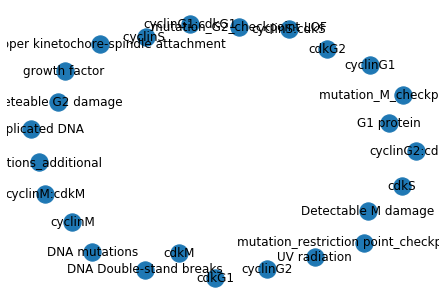

In [15]:
model.draw()

In [16]:
model = cc.read("sample.sbml")

2019-10-24 16:21:47,054 | INFO | Dispatching a POST Request to URL: https://cellcollective.org/_api/model/import with Arguments - {'files': {'upload': ('sample.sbml', <_io.BufferedReader name='sample.sbml'>)}}


In [17]:
model.species

[<Species id=-1026 name='MMP3'>,
 <Species id=-1028 name='MMP1'>,
 <Species id=-1030 name='MMP1'>,
 <Species id=-1032 name='IL6'>,
 <Species id=-1034 name='JAK2_phosphorylated'>,
 <Species id=-1036 name='TNFSF11_rna'>,
 <Species id=-1038 name='Osteoclastogenesis_phenotype'>,
 <Species id=-1040 name='Bone Erosion_phenotype'>,
 <Species id=-1042 name='STAT3_phosphorylated'>,
 <Species id=-1044 name='STAT3_phosphorylated'>,
 <Species id=-1046 name='p38MAPK_phosphorylated'>,
 <Species id=-1048 name='Ca^_2+_ion'>,
 <Species id=-1050 name='MIR192_rna'>,
 <Species id=-1052 name='CAV1_rna'>,
 <Species id=-1054 name='RAB5A_rna'>,
 <Species id=-1056 name='CPNE3_rna'>,
 <Species id=-1058 name='BAD_phosphorylated'>,
 <Species id=-1060 name='IL12A_rna'>,
 <Species id=-1062 name='IL18'>,
 <Species id=-1064 name='SRC_phosphorylated'>,
 <Species id=-1066 name='MIR338-5P_rna'>,
 <Species id=-1068 name='IL1B'>,
 <Species id=-1070 name='IL17A'>,
 <Species id=-1072 name='WNT5A'>,
 <Species id=-1074 name='

In [18]:
import cc
client = cc.Client()
model = client.get("model", id_ = 2171)
model.species[:3]

2019-10-24 16:22:11,122 | INFO | Dispatching a GET Request to URL: https://cellcollective.org/_api/model/get/2171 with Arguments - {'params': None}


[<Species id=112401 name='cd28'>,
 <Species id=112400 name='cd28_input'>,
 <Species id=112403 name='tcrlig'>]